In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from scipy import signal

In [2]:
from MyPlots import plot_DFT

## **Discrete Fourier Transform** 

$X[k] = \sum_{n=0}^{N-1}x[n]e^{\frac{-j2\pi kn}{N}}$, $k = 0, 1, ..., N-1$


- $X[k]:$ É o 'spectrum'.
- $N$: É o número de amostras do sinal. 
- $n:$ index discreto no tempo (tempo normalizado, T=1).
- $k:$ index discreto na frequência.
- $\omega_k = (\frac{2\pi k}{N}):$ frequência em $\frac{radianos}{segundos}$.
- $f_k = (\frac{f_s k}{N}):$ frequência em Hz ($f_s$: frequência de amostragem).

Vamos simplificar a notação utilizando a seguinte equação para as exponenciais complexas $s^*_k = e^{\frac{-j(2\pi kn)}{N}}$. Dessa forma podemos escrever a $DFT$ como um produto escalar:

$X[k] = \langle x {,} s_k\rangle = \sum_{n=0}^{N-1}x[n]s^*_k[n]$

---

**Exemplo:**
Suponha o seguinte sinal no tempo $x[n] = [1,-1,1,-1]$, com 4 amostras ($N=4$), isto é, $n=0,1,2,3$. Portante para realizar a transformada precisamos de 4 frequências ($k=0,1,2,3$). Para cada combinação amostra frequência calculamos uma exponencial complexa, da seguinte forma:

\begin{align}
    s^*_0 &= cos(\frac{2\pi 0n}{4}) - jsin(\frac{2\pi 0n}{4}) = [1,1,1,1] \\
    s^*_1 &= cos(\frac{2\pi 1n}{4}) - jsin(\frac{2\pi 1n}{4}) = [1,-j,-1,j] \\
    s^*_2 &= cos(\frac{2\pi 2n}{4}) - jsin(\frac{2\pi 2n}{4}) = [1,-1,1,-1] \\
    s^*_3 &= cos(\frac{2\pi 3n}{4}) - jsin(\frac{2\pi 3n}{4}) = [1,j,-1,-j]
\end{align}

<span style='color:purple'> <b>OBS: </span> A variável $n$ é o indice, **não** é o valor referente a $x[n]$.

Agora basta calcularmos os produtos escalares para cada frequência:

\begin{align}
\langle x {,} s^*_0\rangle &= 0 \\ 
\langle x {,} s^*_1\rangle &= 0 \\ 
\langle x {,} s^*_2\rangle &= 4 \\ 
\langle x {,} s^*_3\rangle &= 0 
\end{align}

    
No índice igual a dois temos uma componente de magnitude quatro. A frequência correspondente a esse coeficiente dependerá da taxa de amostragem do sinal e pode ser encontrada com a seguinte fórmula:
    
$$
freq = \frac{indice*f_s}{N}
$$
    
---

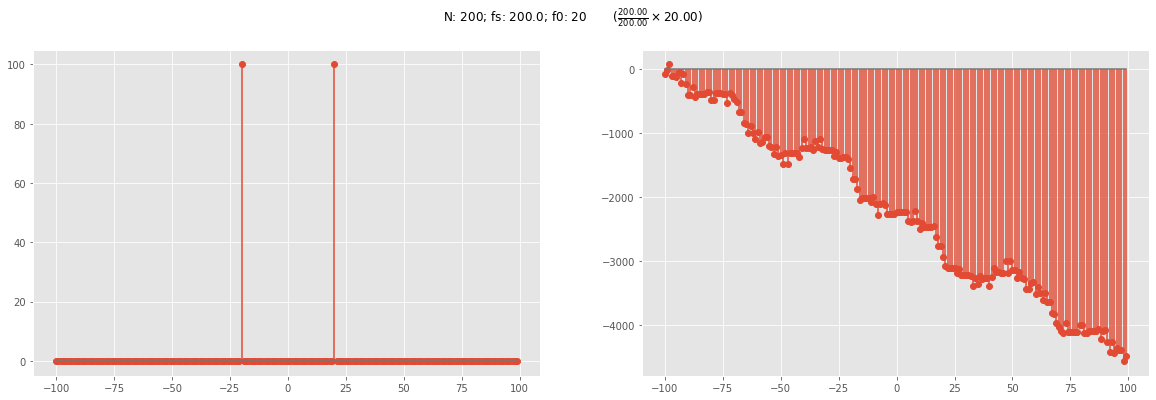

In [15]:
#Parêmetros iniciais
N  = 200 # Samples
f0 = 20  #Frequência Fundamental 

ti = 0
tf = 1 # PRECISA ESTAR NORMALIZADO
dt = (tf-ti)/N

t = np.arange(ti,tf,dt)

# Sinal de input
# x_exp  = np.exp(1j*2*np.pi*f0 * t)
# x_sin  = np.sin(2*np.pi*f0    * t)
x_cos  = np.cos(2*np.pi*f0 * t)

#Fourier Transform
X_k = []

ns = np.arange(-N/2, N/2)
ks = np.arange(-N/2, N/2)
    
for k in ks:
    s = np.exp(-1j*2*np.pi*k/N * ns)
    X_k.append(sum(x_cos*s))

#Plotting figure
fig, axs = plt.subplots(1,2,figsize = (20,6))

# Mapping k to Hz
freqs = (np.array(ks)*(1/dt))/N

axs[0].stem(freqs, np.real(X_k))
axs[1].stem(freqs, np.unwrap(np.angle(X_k,deg=True),discont=180))

plt.suptitle(f"N: {round(N,2)}; fs: {round(1/dt,2)}; f0: {round(f0,2)}\t" + r"$(\frac{%.2f}{%.2f}\times%.2f)$" % (N,1/dt,f0))
plt.show()

## **Inverse Discrete Fourier Transform** 

$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{\frac{j 2\pi kn}{N}}$, $n = 0,1, ... , N-1$

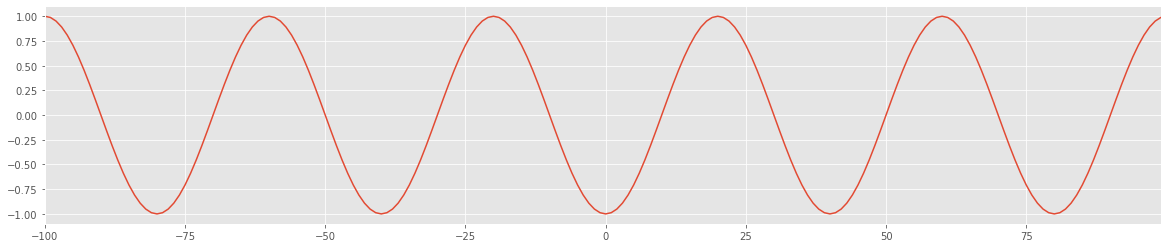

In [14]:
#Input Signal
N  = 200 # Samples
f0 = 5  #Frequência Fundamental 

x_cos  = np.cos(2 * np.pi * f0 /N * np.arange(N))
 
# X_k é do último gráfico
X_k = plot_DFT(x_cos, plot=False)

x_n = []
ns  = np.arange(-N/2,N/2)
ks  = np.arange(-N/2,N/2)

for n in ns:
    s_k = np.exp(1j * 2 * np.pi * n/N * ks)
    x_n.append(1.0/N * sum(X_k*s_k))

fig = plt.figure(figsize=(20,4))
plt.plot(ks, np.real(x_n))
plt.axis([-N/2, N/2-1,-1.1,1.1])
plt.show()